In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

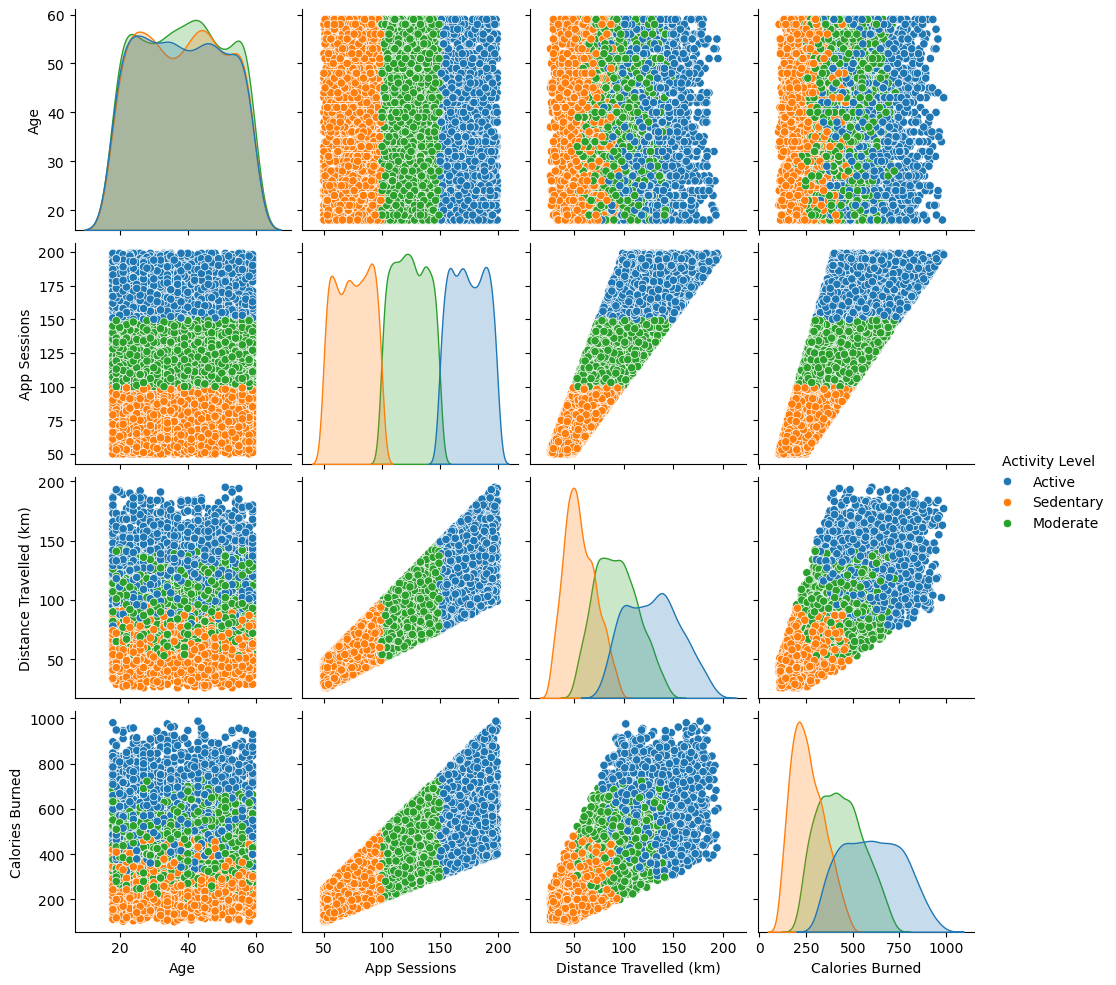

In [18]:
# Load the dataset
df = pd.read_csv('dataset_for_assignment2.csv')
# Remove User ID column
df = df.drop('User ID', axis=1)
# Create the pairplot
pairplot = sns.pairplot(df, hue='Activity Level')
plt.show()
# Save the plot as an image
pairplot.savefig('pairplot.png')

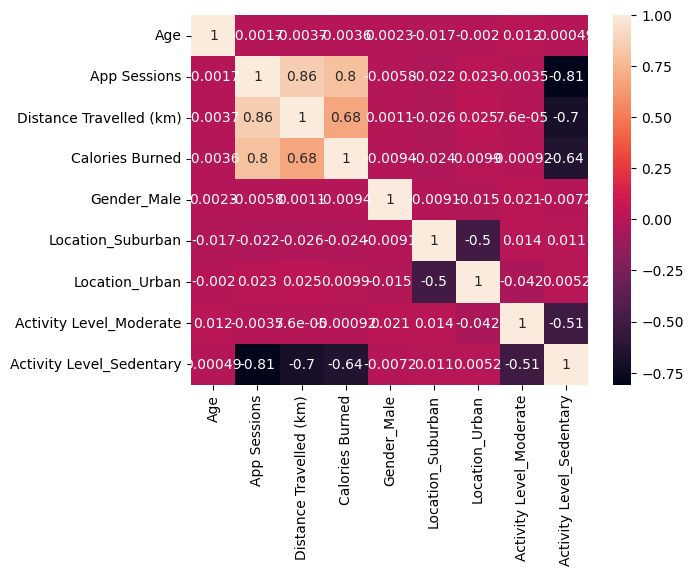

In [16]:
# Convert categorical data for correlation heatmap
categorical_columns = ['Gender', 'Location', 'Activity Level']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

In [17]:
# Preprocess the data
X = df.drop(['Activity Level'], axis=1)
y = df['Activity Level']
X = pd.get_dummies(X, columns=['Gender', 'Location'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Analyze the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Confusion Matrix:
[[487   0   0]
 [  0 511   0]
 [  0   0 502]]
Classification Report:
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00       487
    Moderate       1.00      1.00      1.00       511
   Sedentary       1.00      1.00      1.00       502

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Accuracy Score:
1.0
                         importance
App Sessions               0.684660
Distance Travelled (km)    0.175248
Calories Burned            0.129015
Age                        0.007860
Gender_Male                0.001327
Location_Urban             0.000994
Location_Suburban          0.000896
